# QCNN demo

In [2]:
from qcnn import QuantumCNN
from qibo import gates
import random
import numpy as np

import qibo
qibo.set_backend("numpy")

[Qibo 0.1.8|INFO|2023-02-13 12:29:39]: Using numpy backend on /CPU:0


## load data

In [11]:
data = np.load('nqubits_4_data_shuffled_no0.npy')
labels = np.load('nqubits_4_labels_shuffled_no0.npy')
labels = np.transpose(np.array([labels])) # restructure to required array format

In [12]:
data[-2:]

array([[0.52745364+0.j, 0.19856967+0.j, 0.19856967+0.j, 0.16507377+0.j,
        0.19856967+0.j, 0.09784837+0.j, 0.16507377+0.j, 0.19856967+0.j,
        0.19856967+0.j, 0.16507377+0.j, 0.09784837+0.j, 0.19856967+0.j,
        0.16507377+0.j, 0.19856967+0.j, 0.19856967+0.j, 0.52745364+0.j],
       [0.67109214+0.j, 0.10384038+0.j, 0.10384038+0.j, 0.05351362+0.j,
        0.10384038+0.j, 0.02786792+0.j, 0.05351362+0.j, 0.10384038+0.j,
        0.10384038+0.j, 0.05351362+0.j, 0.02786792+0.j, 0.10384038+0.j,
        0.05351362+0.j, 0.10384038+0.j, 0.10384038+0.j, 0.67109214+0.j]])

In [13]:
labels[-2:]

array([[ 1.],
       [-1.]])

## initialize model

In [6]:
# initialize model instance
test = QuantumCNN(nqubits=4, nlayers=1, nclasses=2)
testcircuit = test._circuit
testcircuit.draw()

'q0:     ─RX─RY─RZ─RZZ─RYY─RXX─RX─RY─RZ──────────────────────────────────────── ...\nq1:     ─RX─RY─RZ─RZZ─RYY─RXX─RX─RY─RZ─────────────RX─RY─RZ──────────RZZ─RYY─R ...\nq2:     ──────────────────────RX─RY─RZ─RZZ─RYY─RXX─RX─RY─RZ─RX─RY─RZ─RZZ─RYY─R ...\nq3:     ──────────────────────RX─RY─RZ─RZZ─RYY─RXX─RX─RY─RZ─────────────────── ...\n\nq0: ... ───RX─RY─RZ─RZZ─RYY─RXX─RX─RY─RZ─RX─RY─RZ─o───────────────────────\nq1: ... XX─RX─RY─RZ─|───|───|─────────────────────|─RX─RY─RZ─o────────────\nq2: ... XX─RX─RY─RZ─|───|───|───RX─RY─RZ──────────X─RZ─RY─RX─|────────────\nq3: ... ───RX─RY─RZ─RZZ─RYY─RXX─RX─RY─RZ────────────RX─RY─RZ─X─RZ─RY─RX─M─'

In [17]:
# initialize model parameters
testbias = np.zeros(test.measured_qubits)
testangles = [random.uniform(0,2*np.pi) for i in range(21*2)]
init_theta = np.concatenate((testbias, testangles))

## train and/or update model with optimize parameters

In [ ]:
# train model (automatically updates model with optimized paramters)
result = test.minimize(init_theta, data=data, labels=labels, nshots=10000, method='Powell')

In [ ]:
# alternatively, update model with optimized parameters from previous training
saved_result = (0.37518004206164735, np.array([ 0.05368594,  2.12012694,  2.95697773,  0.60518956,  2.51820153,
        2.95333363,  2.35358783,  2.52548046,  6.17361621,  5.14065087,
        1.35459873,  1.70519722,  2.55822783,  3.43136954,  5.96385693,
        4.36994029,  6.44098291,  3.71631498,  2.20483325,  2.10868282,
        4.0078324 , 30.4276404 , 21.06173988, 15.32159141,  8.65229479,
       11.65082011, 14.87624693, 20.11086026,  9.20322951,  7.26615611,
       -0.16815041, 16.38359829,  7.54638571, 10.41015863,  6.44648262,
       14.89135036, 16.98371482, -0.42979271,  1.98089151, 23.65288829,
        4.16668502, 20.4802026 ,  4.19872457]))

test.set_circuit_params(angles=saved_result[1], has_bias=True)

## generate predictions from optimized model

In [18]:
# generate predictions from optimized model
predictions = []
for n in range(len(data)):
    predictions.append(test.predict(data[n], nshots=10000)[0])

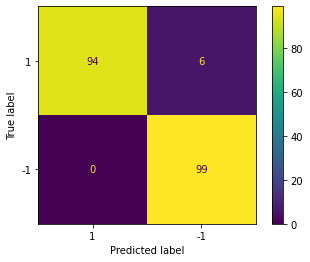

In [98]:
# result visualization
from sklearn import metrics

actual = [np.sign(label) for label in labels]
predicted = [np.sign(prediction) for prediction in predictions]

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1, -1])

cm_display.plot()
plt.show()

In [96]:
test.Accuracy(labels,predictions)

0.9698492462311558